In [21]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# 设置超参数
batch_size = 32
lr = 0.01
epoch = 12

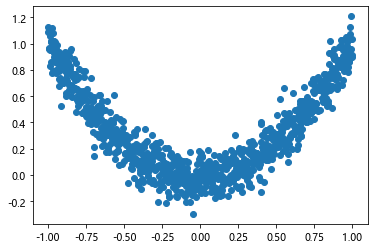

In [23]:
# 创建数据
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(x.size()))
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [24]:
# 批处理加载数据
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)
#建立模型
Net = torch.nn.Sequential(
    torch.nn.Linear(1,20),
    torch.nn.ReLU(),
    torch.nn.Linear(20,1)
)
# class Net(torch.nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.hidden = torch.nn.Linear(1, 20)  # hidden layer
#         self.predict = torch.nn.Linear(20, 1)  # output layer

#     def forward(self, x):
#         x = F.relu(self.hidden(x))  # activation function for hidden layer
#         x = self.predict(x)  # linear output
#         return x

In [25]:
# 不同优化器损失比较
if __name__ == '__main__':
    # different nets
    net_SGD         = Net
    net_Momentum    = Net
    net_RMSprop     = Net
    net_Adam        = Net
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

    # different optimizers
    opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=lr)
    opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=lr, momentum=0.8)
    opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=lr, alpha=0.9)
    opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=lr, betas=(0.9, 0.99))
    optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]
    #构建损失函数 
    loss_func = torch.nn.MSELoss()
    losses_his = [[], [], [], []] 

TypeError: forward() missing 1 required positional argument: 'input'

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7


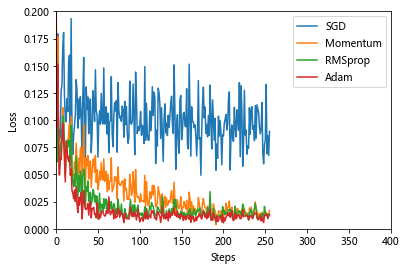

In [ ]:
import numpy as np
# 训练
for epoch in range(epoch):
        print('Epoch: ', epoch)
        for step, (b_x, b_y) in enumerate(loader):          # for each training step
                for net, opt, l_his in zip(nets, optimizers, losses_his):
                        output = net(b_x)              # get output for every net
                        loss = loss_func(output, b_y)  # compute loss for every net
                        opt.zero_grad()                # clear gradients for next train
                        loss.backward()                # backpropagation, compute gradients
                        opt.step()                     # apply gradients
                        l_his.append(loss.data.numpy())     # loss recoder

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
# plt.yticks(np.arange(0, 0.225, step=0.025))
plt.xlim((0,400))
plt.ylim((0,0.2))
plt.show()